# Eight Queens Puzzle Solver

## Problem Description
The Eight Queens puzzle challenges you to place eight chess queens on an 8x8 board where no two queens can attack each other (share same row, column, or diagonal). This classic puzzle demonstrates backtracking algorithms using recursion as explain in [this article](https://medium.com/@egemenokte/solving-the-8-queens-puzzle-recursively-with-python-6440078b68ad)

## Components

### Grid Setup
- Creates an 8x8 chess board grid
- Two options: manual list creation or numpy zeros array

### Core Functions
1. `possible(grid,y,x)`: Checks if queen placement is valid by verifying:
   - Row conflicts
   - Column conflicts
   - Diagonal conflicts

2. `solve(grid)`: Implements backtracking algorithm to:
   - Try queen placements
   - Recursively solve remaining positions
   - Return solution when 8 queens are placed

3. `plot(grid)`: Visualizes solution using:
   - Seaborn heatmap
   - Chess-style coordinates (A-H, 1-8)
   - Color coding for queen positions

### Solution Output
- Finds one of 92 possible valid arrangements
- Visual representation shows queen positions on chessboard

In [1]:
import numpy as np
import copy
##Define empty grid (any size is okay)
grid=[[0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0],
      [0,0,0,0,0,0,0,0]]
#or
N=8
grid=np.zeros([N,N],dtype=int)
grid=grid.tolist()

In [4]:
def possible(grid,y,x): #is it possible to place a queen into y,x?

    l=len(grid) #how big is our grid?

    for i in range(l): #check for queens on row y
        if grid[y][i]==1: #if exist return false
            return False
    for i in range(l):  #check for queens on column x
        if grid[i][x]==1: #if exists return 0
            return False

    for i in range(l): #loop through all rows
        for j in range(l): #and columns
            if grid[i][j]==1: #if there is a queen
                if abs(i - y) == abs(j - x): #and if there is another on a diagonal
                    return False #return false
    return True #if every check clears, we can return true

def solve(grid):

    l=len(grid) #length of our grid

    for y in range(l): #for every row
        for x in range(l): #for every column
            if grid[y][x]==0: # we can place if there is no queen in given position
                if possible(grid,y,x): #if empty, check if we can place a queen
                    grid[y][x]=1 #if we can, then place it
                    solve(grid) #pass grid for recursive solution
                    #if we end up here, means we searched through all children branches
                    if sum(sum(a) for a in grid)==l: #if there are 8 queens
                        return grid #we are successful so return
                    grid[y][x]=0 #remove the previous placed queen


    return grid #means we searched the space, we can return our result

def plot(grid):# Plot the solution on a chessboard
    import seaborn as sns
    import matplotlib.pyplot as plt
    import string

    l=len(grid)
    Ly=list(range(1,l+1))[::-1]
    ly = [str(i) for i in Ly]
    Lx=list(string.ascii_uppercase)
    lx=Lx[:l]

    plt.close('all')
    sns.set(font_scale = 2)
    plt.figure(figsize=(5,5))
    ax = plt.gca() #you first need to get the axis handle
    ax.set_aspect(1)
    sns.heatmap(Solution,linewidths=.8,cbar=False,linecolor='blue',
                cmap='Reds',center=0.4,xticklabels=lx,yticklabels=ly)

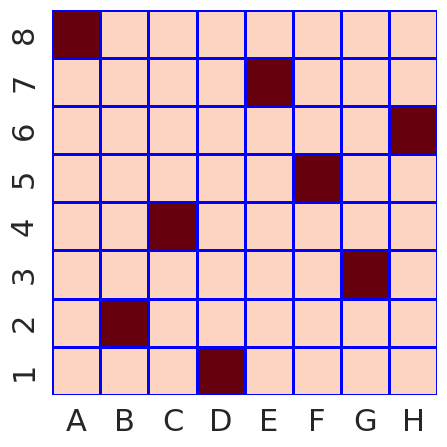

In [5]:
Solution = solve(copy.deepcopy(grid)) #get the solution
plot(grid)